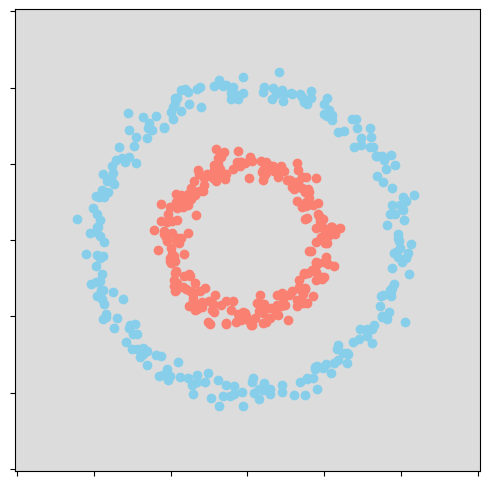

In [ ]:
#Importando el conjunto de datos
#En caso de ejecutar en el computador es necesario instalar los requerimientos

#Requirement.txt
#A continuación la información de Requirement.txt
#image==1.5.20.
#numpy==1.14.3
#tensorflow==1.4.0


import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concéntricos de datos.
x, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_px = np.array(np.meshgrid(_x0, _x1)).T. reshape(-1, 2)

# objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros ((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(6, 6))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

#Visualización de la nube de datos.
plt. scatter (x[Y == 0,0], x[Y == 0,1], c="skyblue")
plt. scatter (x[Y == 1,0], x[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)



Instructions for updating:
non-resource variables are not supported in the long term


Step 0 / 1000 - Loss = 0.47661793 - ACC = 0.5
Step 25 / 1000 - Loss = 0.4576863 - ACC = 0.5
Step 50 / 1000 - Loss = 0.41119608 - ACC = 0.5
Step 75 / 1000 - Loss = 0.32100102 - ACC = 0.518
Step 100 / 1000 - Loss = 0.20215143 - ACC = 0.648
Step 125 / 1000 - Loss = 0.17361316 - ACC = 0.734
Step 150 / 1000 - Loss = 0.16354024 - ACC = 0.826
Step 175 / 1000 - Loss = 0.15690207 - ACC = 0.84
Step 200 / 1000 - Loss = 0.15073396 - ACC = 0.854
Step 225 / 1000 - Loss = 0.14496768 - ACC = 0.856
Step 250 / 1000 - Loss = 0.1396728 - ACC = 0.866
Step 275 / 1000 - Loss = 0.13473739 - ACC = 0.868
Step 300 / 1000 - Loss = 0.13000223 - ACC = 0.866
Step 325 / 1000 - Loss = 0.12560205 - ACC = 0.874
Step 350 / 1000 - Loss = 0.121354684 - ACC = 0.878
Step 375 / 1000 - Loss = 0.11736811 - ACC = 0.884
Step 400 / 1000 - Loss = 0.11360177 - ACC = 0.89
Step 425 / 1000 - Loss = 0.10991344 - ACC = 0.89
Step 450 / 1000 - Loss = 0.10622664 - ACC = 0.892
Step 475 / 1000 - Loss = 0.10247341 - ACC = 0.892
Step 500 / 1000

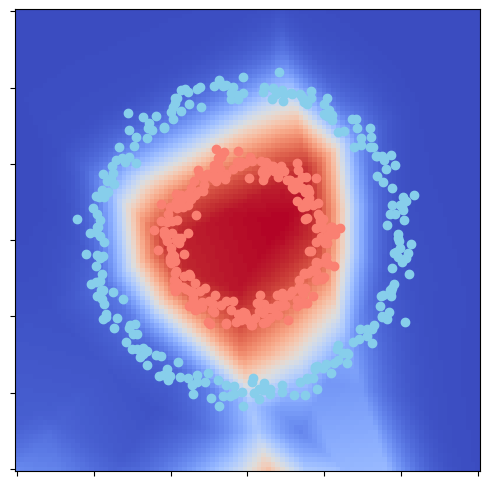

In [ ]:
#Definición de la arquitectura de la red neuronal
#Tensorflow

#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz x ey.
iX = tf.placeholder(tf.float32, shape=[None, x.shape[1]])
iY = tf.placeholder('float', shape=[None])

# Parámetros de la red neuronal
lr = 0.01              # learning rate
nn = [2, 16, 8, 1]     # número de neuronas en cada capa

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name="weights_1")
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add (tf.matmul(l2, W3), b3))[:, 0]

# Evaluación de las predicciones
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000 # Número de ciclos de entrenamiento.
iPY = []  #Aquí guardaremos la evolución de las predicción, para la animación.


with tf.Session() as sess:
  #Inicializamos todos los parámetros de la red, las matrices w y b.
  sess.run(tf.global_variables_initializer())
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
    # Evaluamos al optimizador, a la función de coste y al tensor de salida py.
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX: x, iY: Y })
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0:
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss =', _loss, '- ACC =', acc)
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _px.
      _pY = sess. run(pY, feed_dict={ iX: _px }).reshape((res, res))
      # Y Lo guardamos para visualizar la animación.
      iPY.append(_pY)

# CÓDIGO ANIMACIÓN
ims= []
fig = plt.figure(figsize=(6,6))
print("Generando animación")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
  # Visualización de la nube de datos.
  plt.scatter(x[Y == 0,0], x[Y == 0,1], c="skyblue")
  plt.scatter(x[Y == 1,0], x[Y == 1,1], c="salmon")
  # plt. title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML (ani.to_html5_video())


In [ ]:
#pip install --upgrade tensorflow

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.0000e+00 - loss: 0.0867
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.0000e+00 - loss: 0.0766
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.0000e+00 - loss: 0.0841
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.0000e+00 - loss: 0.0850
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 0.0000e+00 - loss: 0.0802
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.0000e+00 - loss: 0.0813
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.0000e+00 - loss: 0.0863
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.0000e+00 - loss: 0.0852
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.0000e+00 - loss: 0.0833
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.0000e+00 - loss: 0.0800
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.0000e+00 - loss: 0.0859
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - acc: 0.0000e+00 - loss: 0.0829
E

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (32, 16)                    │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (32, 8)                     │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (32, 1)                     │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 195 (784.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

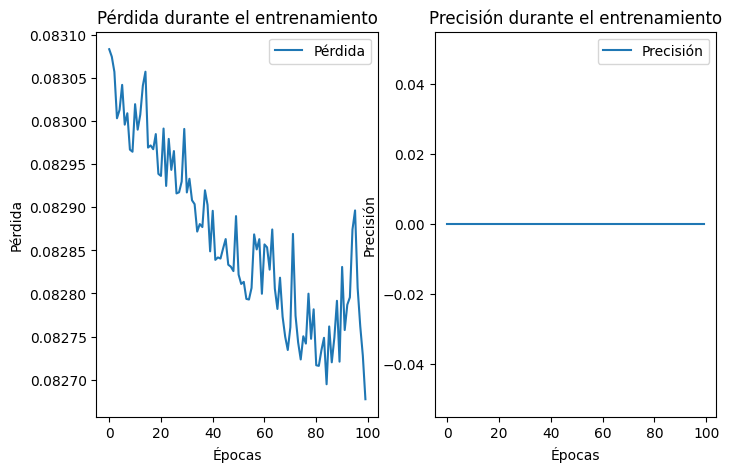

In [ ]:
#Con Keras
import numpy as np
import tensorflow as tf
from tensorflow import keras as kr
import matplotlib.pyplot as plt

# Habilitar ejecución ansiosa (debería estar habilitada por defecto en TensorFlow 2.x)
#tf.config.run_functions_eagerly(True)

lr = 0.05          # learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

# Crear el modelo secuencial
model = kr.Sequential()

# Añadir la capa 1
#model.add(kr.layers.Dense(nn[1], activation='relu', input_shape=(nn[0],)))
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadir la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadir la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilar el modelo, definiendo la función de coste y el optimizador
model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=lr), metrics=['acc'])

# Crear datos de ejemplo para X e Y
#X = np.random.rand(100, nn[0])  # 100 muestras con nn[0] características
#Y = np.random.rand(100, nn[3])  # 100 muestras con nn[3] características (salidas)

# Entrenar el modelo
model.fit(X, Y, epochs=100)

# Entrenar el modelo y almacenar la historia del entrenamiento
history = model.fit(X, Y, epochs=100, verbose=0)

# Imprimir un resumen del modelo
model.summary()

# Graficar la historia del entrenamiento
plt.figure(figsize=(8, 5))

# Graficar la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Precisión')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()


In [7]:
#Con SCikit Learn

import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML

lr = 0.01          # learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor (solver='sgd',
                                      learning_rate_init=lr,
                                      hidden_layer_sizes=tuple(nn[1:]),
                                      verbose=True,
                                      n_iter_no_change=1000,
                                      batch_size = 64)

# Y lo entrenamos con nuestros datos.
clf. fit(X, Y)


Iteration 1, loss = 0.29461495
Iteration 2, loss = 0.18198817
Iteration 3, loss = 0.13001363
Iteration 4, loss = 0.12556811
Iteration 5, loss = 0.12766755
Iteration 6, loss = 0.12697464
Iteration 7, loss = 0.12541842
Iteration 8, loss = 0.12500153
Iteration 9, loss = 0.12498639
Iteration 10, loss = 0.12530526
Iteration 11, loss = 0.12514110
Iteration 12, loss = 0.12507701
Iteration 13, loss = 0.12505836
Iteration 14, loss = 0.12508559
Iteration 15, loss = 0.12507550
Iteration 16, loss = 0.12509372
Iteration 17, loss = 0.12505007
Iteration 18, loss = 0.12514790
Iteration 19, loss = 0.12503995
Iteration 20, loss = 0.12508368
Iteration 21, loss = 0.12505010
Iteration 22, loss = 0.12519708
Iteration 23, loss = 0.12512278
Iteration 24, loss = 0.12509798
Iteration 25, loss = 0.12503299
Iteration 26, loss = 0.12514761
Iteration 27, loss = 0.12504045
Iteration 28, loss = 0.12506881
Iteration 29, loss = 0.12503550
Iteration 30, loss = 0.12512780
Iteration 31, loss = 0.12510770
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)